# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Metrics to Evaluate a Classifier

We have made some forecasts using an ML model. Now, let's figure out whether they were good or bad. To do that, we will use the predicted output (`y_pred`) and the expected output (`y_test`).

1. [Read the Data](#read)
1. [Accuracy](#accuracy)
1. [Confusion Matrix](#cm)
1. [Classification Report](#cr)

## Import Libraries

In [1]:
# For data manipulation
import pandas as pd

# Libraries for evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import matplotlib.colors as clrs

<a id='read'></a> 
## Read the Data
To evaluate the performance, we will read the model predicted values (`y_pred`) and the expected target values (`y_test`) from the `test_data`.

In [2]:
# Define the path for the data files
path = "../data_modules/"

# Read the model predicted target values
y_pred = pd.read_csv(path + "JPM_predicted_2017_2019.csv",
                     index_col=0, parse_dates=True)['signal']

# Read the target values of the testing dataset
y_test = pd.read_csv(path + "JPM_target_testing_2017_2019.csv",
                     index_col=0, parse_dates=True)['signal']

<a id='accuracy'></a> 
## Accuracy

The first performance measure that comes to mind is accuracy. Accuracy is nothing but the total correct predictions divided by the total predictions. We plot the data to see how the correct and incorrect predictions are distributed. The green points are where the prediction was correct and the red points are where the predictions were incorrect.

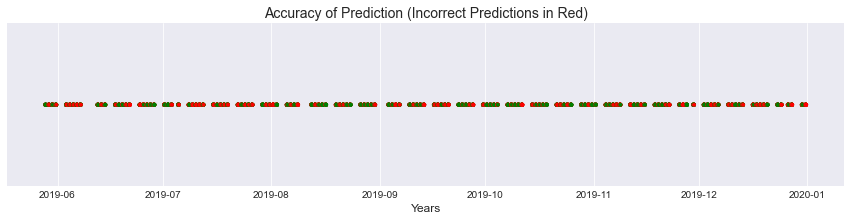

The accuracy is 51.55%.


In [3]:
# Define the accuracy data
accuracy_data = (y_pred == y_test)

# Accuracy percentage
accuracy_percentage = round(100 * accuracy_data.sum()/len(accuracy_data), 2)

# Plot the accuracy data
plt.figure(figsize=(15, 3))

# Colour mapping for the correct and incorrect predictions
cmap = clrs.ListedColormap(['green', 'red'])

plt.yticks([])
plt.scatter(x=y_test.index, y=[1]*len(y_test),
            c=(accuracy_data != True).astype(float), marker='.', cmap=cmap)

# Set the title and axis label
plt.title("Accuracy of Prediction (Incorrect Predictions in Red)", fontsize=14)
plt.xlabel('Years', fontsize=12)

# Display the results
plt.show()
print(f"The accuracy is {accuracy_percentage}%.")

The accuracy is calculated as seen above. These calculations for the accuracy and other performance metrics can be done using the ready-made `classification_report` method. You will learn about the `classification_report` method in the latter part of the notebook.

<a id='cm'></a> 
## Confusion Matrix

The confusion matrix is a table that can be used to interpret the model performance. The labels of the confusion matrix are the actions predicted by the model on the x-axis and the expected actions on the y-axis.

Syntax:
```python
confusion_matrix(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns:
A `numpy` array of the confusion matrix.

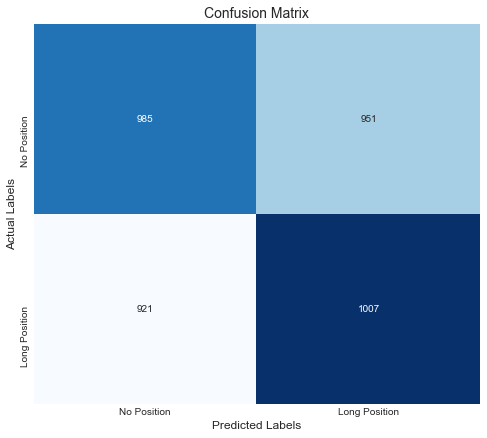

In [4]:
# Define the confusion matrix
confusion_matrix_data = confusion_matrix(y_test.values, y_pred.values)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(confusion_matrix_data, fmt="d",
            cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and the title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

# Display the plot
plt.show()

The confusion matrix as seen above gives us the following information:

1. True Positive: 1007 correct predictions for taking a long position.
2. False Positive: 951 incorrect predictions for taking a long position when the expected action was no position.
3. True Negative: 985 correct predictions for taking no position.
4. False Negative: 921 incorrect predictions for taking no position when the expected action was to take a long position.

<a id='cr'></a> 
## Classification Report

Let us look at the formulae for the different performance metrics.

$$
\text{Recall} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of the actual outcomes}}\\[1cm]
\text{Precision} = \frac{\text{Number of times the algorithm predicted an outcome correctly}}{\text{Total number of said outcomes predicted by the algorithm}}\\[1cm]
\text{f1-score} = \frac{2 * \text{(precision * recall)}}{\text{(precision + recall)}}\\[1cm]
$$

The `scikit-learn` library has a function called `classification_report` which provides measures like precision, recall, f1-score and support for each class. Precision and recall indicate the quality of our predictions. The f1-score gives the harmonic mean of precision and recall. The support values are used as weights to compute the average values of precision, recall and f1-score.

An f1-score above 0.5 is usually considered a good number.

You can simply use the following syntax to print the classification report.

Syntax:
```python
classification_report(y_test, y_pred)
```

Parameters:
1. **y_test:** The observed target from the training dataset.
2. **y_pred:** The predicted target from the model.

Returns: <br>
Classification Report containing precision, recall, f1-score and support.

In [5]:
# Classification report
classification_report_data = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1936
           1       0.51      0.52      0.52      1928

    accuracy                           0.52      3864
   macro avg       0.52      0.52      0.52      3864
weighted avg       0.52      0.52      0.52      3864



In the left-most column, you can see the values 0.0 and 1.0. These represent the position as follows:

1. `0` means no position
1. `1` means a long position

So from the table, you can say that the ML Model has an overall accuracy score of 0.52. The accuracy we calculated was 51.55% which is approximately 0.52. Apart from accuracy, you can identify the precision, recall, and f1-score for the signals as well. 

Support is the number of actual occurrences of the class in the specified dataset. Thus, in the total signal, there were 1936 occurrences of `0`, and 1928 occurrences of the `1` signal.

The accuracy score tells you how the ML model performed in total. 

What are macro and weighted average?

Sometimes, the signal values might not be balanced. There could be instances where the number of occurrences for `0` is barely 50 while the number of occurrences for `1.0` is 500. In this scenario, the weighted average will give more weightage to the signal `1`. In contrast, the macro average takes a simple average of all the occurrences.

## Conclusion

Thus, the machine learning model's performance can be analysed using the metrics you have learned in this notebook. Now lets backtest this model and see how it would have performed!<br><br>